# First Kaggle Competition Titanic Dataset

The goal of this project to predict whether a passanger survived given certain attributes. The titanic data set contains the followings columns:

- survival: 1 = Yes / 0 = No
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: sex	
- Age: age in years	
- sibsp: number of siblings / spouses aboard the Titanic	
- parch: number of parents / children aboard the Titanic	
- ticket: ticket number	
- fare:	Passenger fare	
- cabin: Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

Notes:
1. I think gender will impact the survival rate. Woman and children would be prioritze over men.
2. People who are in the lower class might not be prioritized and their location might be in the lower deck. 
3. Cabin number will determine the location on the ship, I think in any emegency situation the location is really important.

In [38]:
# libaries dependency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/train.csv')

## Exploratory Data Analysis

In this section we are going to explore the data to find clues, pattern and error in the dataset. The goal is to learn more about the dataset and figure out what attributes shows strong indication of the passanger surival. 

In [40]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
test_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# Train dataset
# 697,0,3,"Kelly, Mr. James",male,44,0,0,363592,8.05,,S
# Test dataset
# 892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q

Although it seems similar, there some differnces in the attributes of the train and test dataset. Other notes:

1. Too much missing value for Cabin attribute / better drop it
2. Some missing value is Age column, removal is possbile
3. Name is not important, since the name of a person do not determine their surival rate
4. Passanger ID does not impact surival

In [45]:
# columns to drop
drop_col = ['Name', 'Cabin', 'PassengerId']
print("Before drop ", test_df.shape)
print("Before drop ", train_df.shape)
test_df = test_df.drop(columns=drop_col)
train_df = train_df.drop(columns=drop_col)
print("After drop ", test_df.shape)
print("After drop ", train_df.shape)

Before drop  (891, 12)
Before drop  (891, 12)
After drop  (891, 9)
After drop  (891, 9)


In [46]:
print("Before drop ", test_df.shape)
print("Before drop ", train_df.shape)

test_df = test_df.dropna(axis=0)
train_df = train_df.dropna(axis=0)

print("After drop ", test_df.shape)
print("After drop ", train_df.shape)

Before drop  (891, 9)
Before drop  (891, 9)
After drop  (712, 9)
After drop  (712, 9)


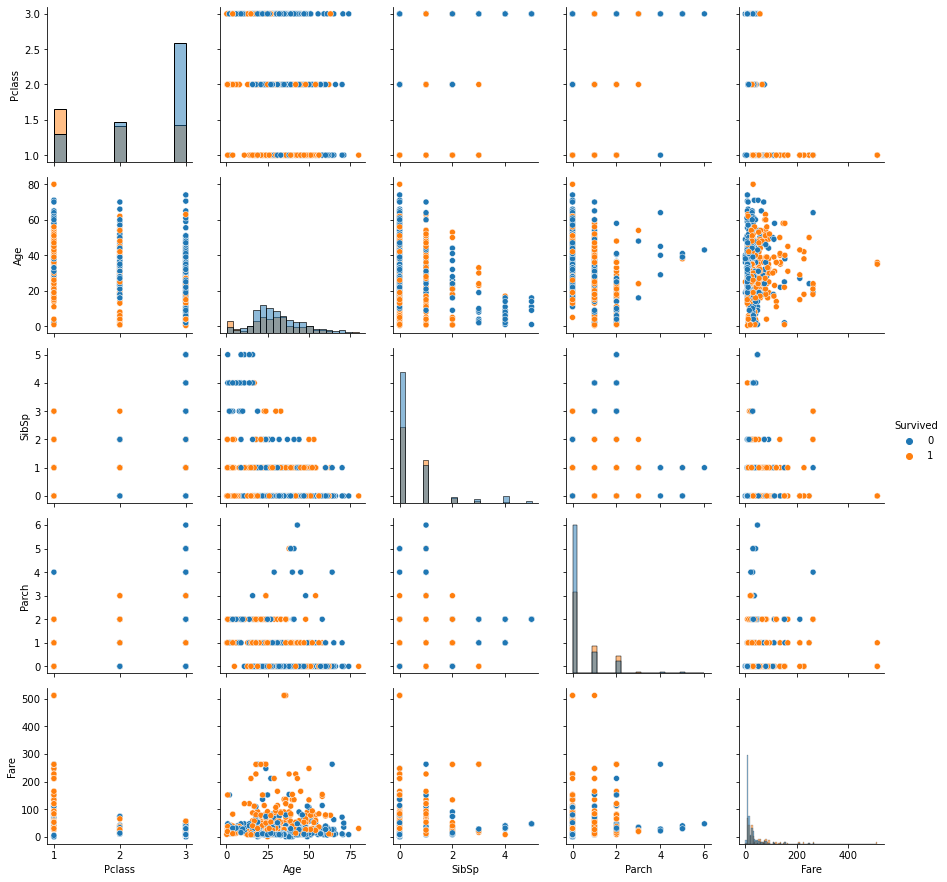

In [47]:
g = sns.PairGrid(train_df, hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [48]:
train_df[train_df['Age'].isna()]['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [49]:
# the age is not integer
train_df[train_df['Age'] % 1 > 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,0,3,male,28.50,0,0,2697,7.2292,C
78,1,2,male,0.83,0,2,248738,29.0000,S
111,0,3,female,14.50,1,0,2665,14.4542,C
116,0,3,male,70.50,0,0,370369,7.7500,Q
122,0,2,male,32.50,1,0,237736,30.0708,C
123,1,2,female,32.50,0,0,27267,13.0000,S
148,0,2,male,36.50,0,2,230080,26.0000,S
152,0,3,male,55.50,0,0,A.5. 11206,8.0500,S
153,0,3,male,40.50,0,2,A/5. 851,14.5000,S
203,0,3,male,45.50,0,0,2628,7.2250,C


In [50]:
# convert to integer, whole value
train_df['Age'] = train_df['Age'].astype(int)

In [51]:
import re

def checkNumber(number):
    result = re.match('^\d+$', number)
    if result:
        return False
    return True

print(checkNumber('A/5 21171'))
print(checkNumber('A123'))
print(checkNumber('113803'))
train_df[train_df['Ticket'].apply(lambda x: checkNumber(str(x))) == True]

True
True
False


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,S
1,1,1,female,38,1,0,PC 17599,71.2833,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
10,1,3,female,4,1,1,PP 9549,16.7000,S
12,0,3,male,20,0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...
866,1,2,female,27,1,0,SC/PARIS 2149,13.8583,C
867,0,1,male,31,0,0,PC 17590,50.4958,S
874,1,2,female,28,1,0,P/PP 3381,24.0000,C
883,0,2,male,28,0,0,C.A./SOTON 34068,10.5000,S


In [52]:
train_df['Ticket'].apply(lambda x: checkNumber(str(x))).sum()

193

In [53]:
# since I don't think that the ticket number is related to the surival rate
drop_col = ['Ticket']
print("Before drop ", test_df.shape)
print("Before drop ", train_df.shape)
test_df = test_df.drop(columns=drop_col)
train_df = train_df.drop(columns=drop_col)
print("After drop ", test_df.shape)
print("After drop ", train_df.shape)

Before drop  (712, 9)
Before drop  (712, 9)
After drop  (712, 8)
After drop  (712, 8)


In [54]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
6,0,1,male,54,0,0,51.8625,S
7,0,3,male,2,3,1,21.0750,S
8,1,3,female,27,0,2,11.1333,S
9,1,2,female,14,1,0,30.0708,C
10,1,3,female,4,1,1,16.7000,S


In [55]:
# convert the collumn in the approriate attributes
col_cat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in col_cat:
    train_df[col] = train_df[col].astype("category")
    test_df[col] = test_df[col].astype("category")



In [56]:
train_df.dtypes

Survived    category
Pclass      category
Sex         category
Age            int64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

Text(0.5, 1.0, 'Test Data Survival Count')

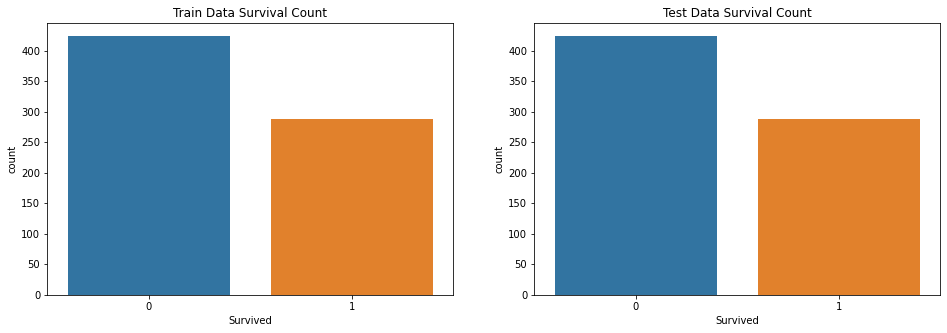

In [57]:
fig, axs = plt.subplots(1,2, figsize=(16,5))

p1 = sns.countplot(data=train_df, x="Survived", ax=axs[0])
p1.set_title('Train Data Survival Count')
p2 = sns.countplot(data=test_df, x="Survived", ax=axs[1])
p2.set_title('Test Data Survival Count')

The distribution is similar between train and test data set which is good. There are more people who died.

In [58]:
def generate_barplot(col):
    fig, axs = plt.subplots(1,2, figsize=(16,5))
    p1 = sns.countplot(data=train_df, x=col, hue="Survived", ax=axs[0])
    p1.set_title('Train Data Survival Count')
    p2 = sns.countplot(data=test_df, x=col, hue="Survived", ax=axs[1])
    p2.set_title('Test Data Survival Count')

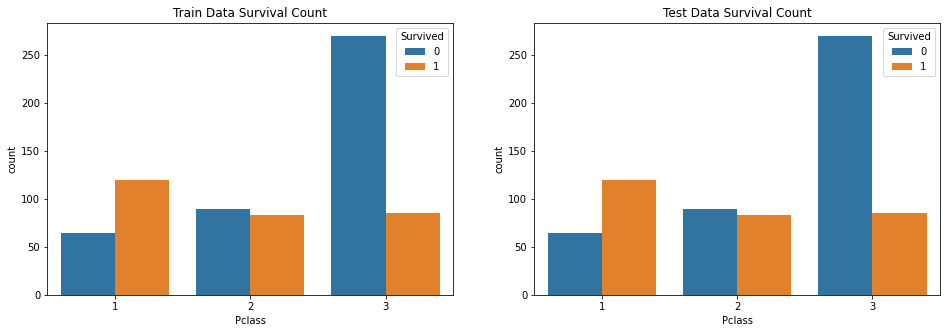

In [59]:
generate_barplot('Pclass')

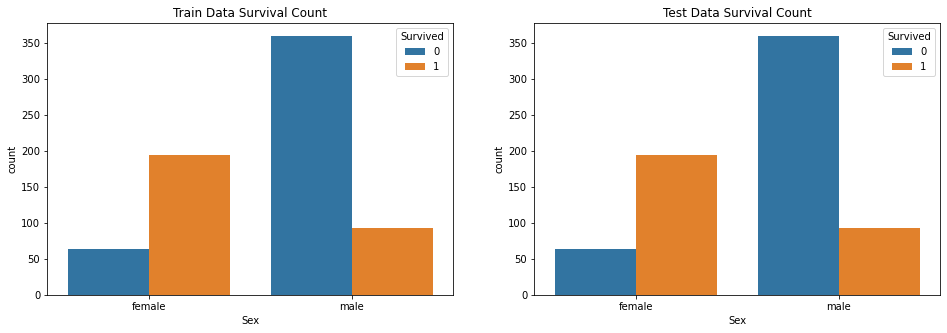

In [60]:
generate_barplot('Sex')

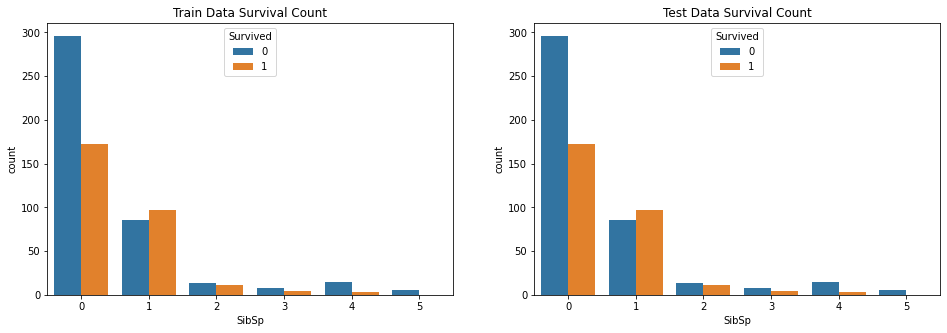

In [61]:
generate_barplot('SibSp')


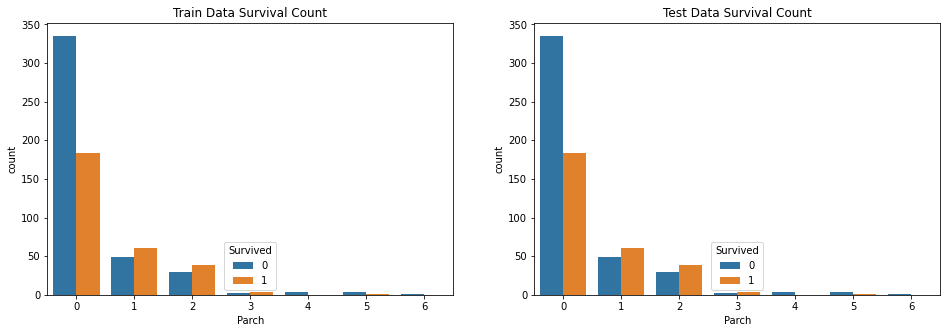

In [62]:
generate_barplot('Parch')

The graphs above shows us that there attributes shows some seperation between the passanger who died and survive. This shows the attributes carry some weight when determining whether a passanger will survive or perish.

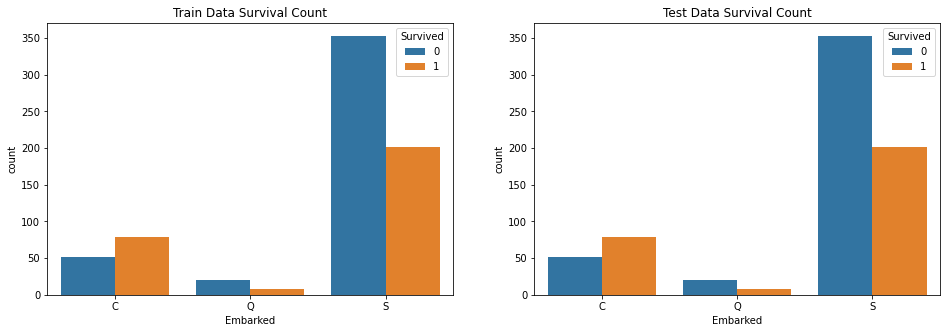

In [89]:
generate_barplot('Embarked')

In [84]:
def generate_boxplot(col):
    fig, axs = plt.subplots(2,2, figsize=(16,16))
    p1 = sns.boxplot(data=train_df, x='Survived', y=col, ax=axs[0,0], palette="Set3")
    p1.set_title('Train Data Survival Count')
    p2 = sns.boxplot(data=test_df, x='Survived', y=col, ax=axs[0,1], palette="Set3")
    p2.set_title('Test Data Survival Count')
    p3 = sns.histplot(data=train_df, x=col, hue='Survived', ax=axs[1,0], palette="Set2")
    p3.set_title('Train Data Survival Distribution')
    p4 = sns.histplot(data=test_df, x=col, hue='Survived', ax=axs[1,1], palette="Set2")
    p4.set_title('Test Data Survival Distribution')

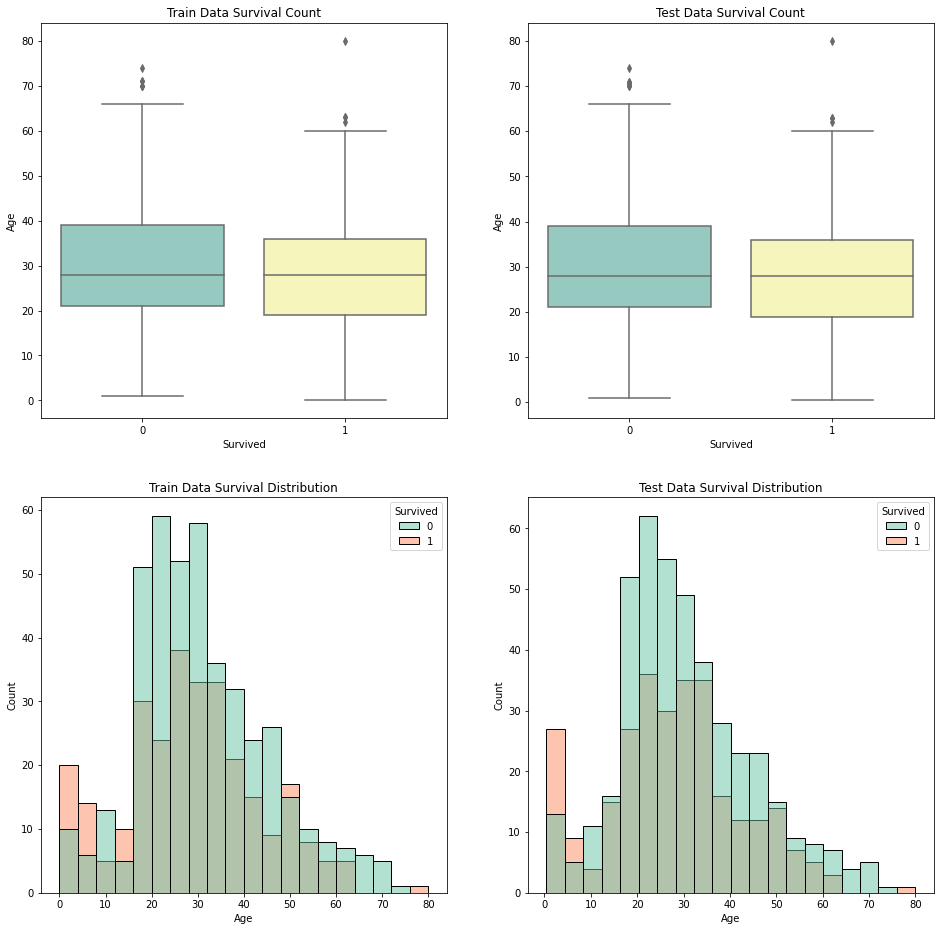

In [85]:
generate_boxplot('Age')

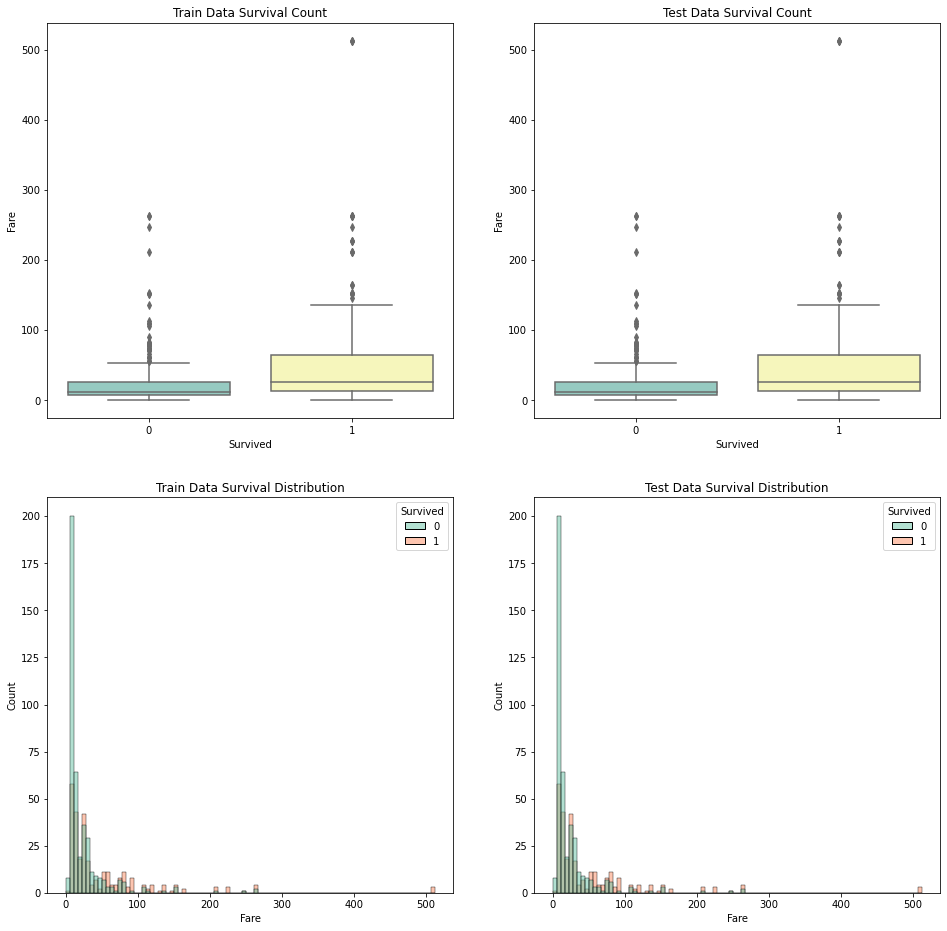

In [86]:
generate_boxplot('Fare')

Although there are outliers and we can't confirm whether the price make senes or not. I decided to only CAP the extreme outliers to certain value by eye.

In [87]:
train_df.loc[train_df[train_df['Fare'] > 400]['Fare'].index, 'Fare'] = 270
test_df.loc[test_df[test_df['Fare'] > 400]['Fare'].index, 'Fare'] = 270

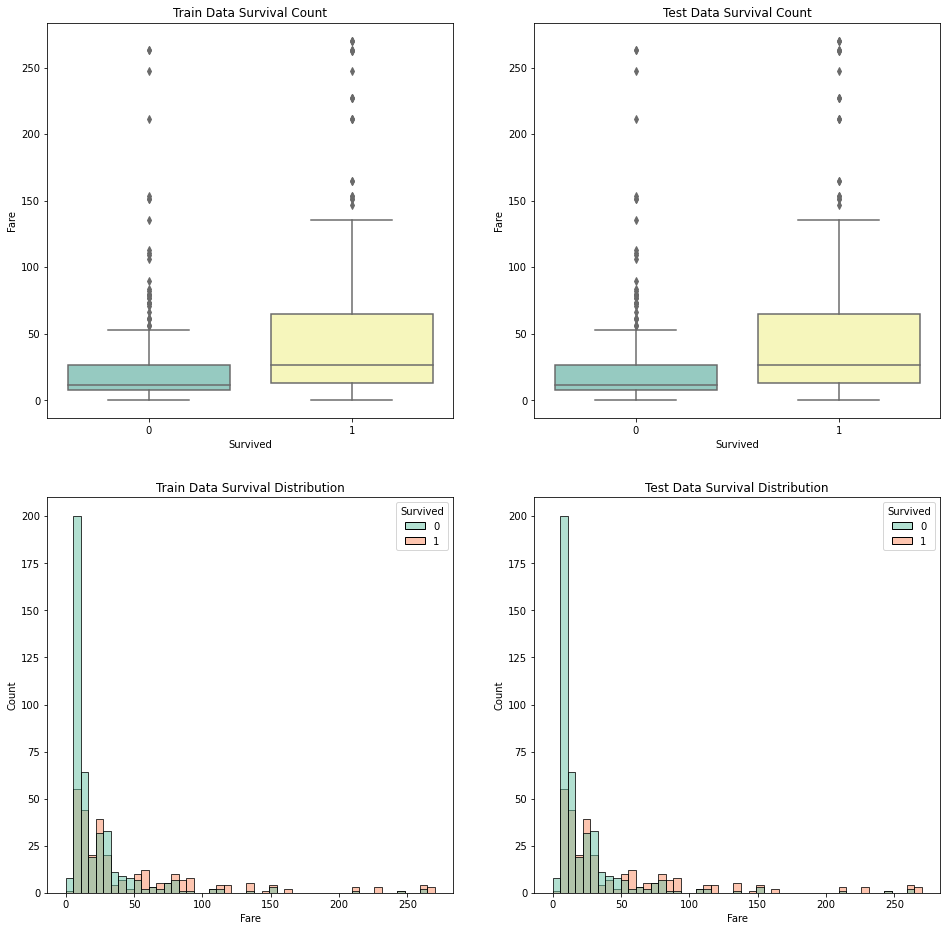

In [88]:
generate_boxplot('Fare')

The Age and Fare attributes does not shows strong separation of passanger who survive and perrish.

In [95]:
print(train_df.groupby(by=['Sex','SibSp'])['Survived'].value_counts())

Sex     SibSp   
female  0      1    113
               0     29
        1      1     67
               0     23
        2      1      9
               0      3
        3      0      4
               1      4
        4      0      4
               1      2
        5      0      1
               1      0
male    0      0    267
               1     60
        1      0     63
               1     30
        2      0     11
               1      2
        3      0      4
               1      0
        4      0     11
               1      1
        5      0      4
               1      0
Name: Survived, dtype: int64


In [96]:
print(train_df.groupby(by=['Sex','Pclass'])['Survived'].value_counts())

Sex     Pclass   
female  1       1     80
                0      3
        2       1     68
                0      6
        3       0     55
                1     47
male    1       0     61
                1     40
        2       0     84
                1     15
        3       0    215
                1     38
Name: Survived, dtype: int64


## EDA Results

### Preprocessing
- Remove some of the useless columns such as Fare, Ticket Number that does not have any correlation 
- Remove Collum with lots of missing value > 50%
- Remove the row with missing value since there is only a few of them
- Cap the outliers
- Change to the appropriate format
- Change age column from float to int

### Result
- The attributes sex and Pclass shows the most separation between the passange who survive and perrish
- Combination with other attributes shows more clear separation of the target variable
- Attributes such as Age and Fare shows no strong separation between the target variable.

From the result, I think that decision tree would be suitable since tree based model does not require preprocessing compared to other model that used distance base such as euclidian, etc.


### Cross Validation & Fine Tuning & Modeling

We are going to use cross validation since the data is not very large so that we get accurate information about our model. We will tune the parameter so the model works well.

In [98]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier



In [ ]:
def runDecisionTreen(n, params):
    cv = KFold(n)
    result = {
        'model': [],
    }
    final_result = 0
    for param in params:
        for train, test in cv.split():
            clf = DecisionTreeClassifier()

